<center><h1>Testing and Documentation Notebook for Cellular Automaton Using Inheritance from Numpy NDArray</h1></center>
<p>This document is for testing of a cellular automaton class which inherits much of its functionality from the Numpy module.  The class enables use of the array opperations (implemented in C) which should make the execution speed better.</p>
<h2>Initialization</h2>

In [1]:
from CellularAutomaton import *
from IPython.display import display
import inspect

from math import *
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

from matplotlib import animation
matplotlib.rc('animation', html='html5')

goldenratio=1/2*(1+sqrt(5))
fsx=7
fsy=fsx/goldenratio

def InfoDocString(function):
    """Function to return function definition and document string."""
    
    code = inspect.getsource(function)
    docstring = inspect.getdoc(function)
    return code[0:code.find(':')+1].lstrip() +'\n' + docstring

<h3>Functions to help with testing</h3>

In [2]:
MyDtype = numpy.dtype([('Value','f'),('State',bool)])

def setstates(grid, rows, columns, states):
    i=0
    for y in range(rows):
        for x in range(columns):
            grid["State"][y][x]=states[i]
            i = i + 1
    grid.SetValue()
    grid.SetBoundary()

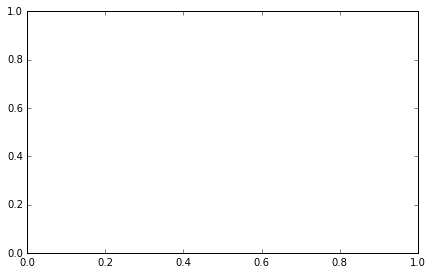

In [3]:
MyFigure, MyAxes = plt.subplots(1,1,figsize=(fsx,fsy))

<h2>Class Structure</h2>
<p>The class CAGrid (or cellular automaton grid) inherts a numpy ndarry array and adds extra functionality to specialize the array for cellular automaton simulations.  In this implementation, each cell element is an array location.  The class also creates arrays for the neighbors in each direction.  In addition to the stucture and functionality provided by numpy arrays, the array stucture should allow for faster simulation calcuations as array operatioins can be executed in c using BLAS subroutines, rather than interperted python interation over cellular automaton cells.  Let us look at the structure of the class.  We begin with the class doc string.</p>

In [10]:
#print(InfoDocString(CAGrid))

In [11]:
#print(InfoDocString(CAGrid.Update))

<h2>Test a 3 x 3 Behavior</h2>
<h3>Checker Board</h3>
<p>The checker board pattern should be stable.  All cells have exactly two neighbors.</p>

In [12]:
rows = 3
columns = 3
MyGrid=CAGrid((rows,columns),MyDtype)
setstates(MyGrid, rows, columns, (0,1,0,1,0,1,0,1,0))
MyAxes.matshow(MyGrid['Value'])
MyFigure
print(MyGrid['State'])
print(MyGrid['Value'])

[[False  True False]
 [ True False  True]
 [False  True False]]
[[ 0.  1.  0.]
 [ 1.  0.  1.]
 [ 0.  1.  0.]]


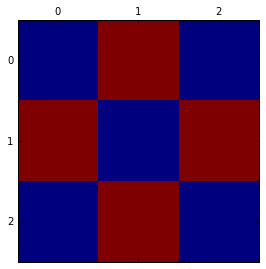

In [13]:
MyAxes.matshow(MyGrid['Value'])
MyFigure

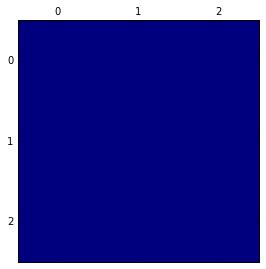

In [14]:
MyGrid.Update()
MyAxes.matshow(MyGrid['Value'])
MyFigure

In [15]:
MyGrid.Update()
print(MyGrid['State'])
print(MyGrid['Value'])

[[False False False]
 [False False False]
 [False False False]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


<h3>Line Continous</h3>
<p>With periodic boundary conditions, a continous line grows and then dies do to overpopulation.</p>

In [16]:
rows = 3
columns = 3
MyGrid=CAGrid((rows,columns),MyDtype)
setstates(MyGrid, rows, columns, (0,0,0,1,1,1,0,0,0))
print(MyGrid['Value'])

[[ 0.  0.  0.]
 [ 1.  1.  1.]
 [ 0.  0.  0.]]


In [17]:
MyGrid.Update()
print(MyGrid['Value'])

[[ 0.  0.  0.]
 [ 1.  1.  1.]
 [ 0.  0.  0.]]


In [18]:
MyGrid.Update()
print(MyGrid['Value'])

[[ 0.  0.  0.]
 [ 1.  1.  1.]
 [ 0.  0.  0.]]


<h3>Blinker</h3>
<p>If we surround the line with empty cells, it is a <a href = http://web.stanford.edu/~cdebs/GameOfLife/ >blinker</a>.</p>

In [19]:
rows = 4
columns = 4
MyGrid=CAGrid((rows,columns),MyDtype)
setstates(MyGrid, rows, columns, (0,0,0,0, 0,1,1,1, 0,0,0,0, 0,0,0,0))
print(MyGrid['Value'])

[[ 0.  0.  0.  0.]
 [ 0.  1.  1.  1.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [20]:
MyGrid.Update()
print(MyGrid['Value'])

[[ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [21]:
MyGrid.Update()
print(MyGrid['Value'])

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [22]:
MyGrid.Update()
print(MyGrid['Value'])

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


<h2>Small Grid Animation Test</h2>

In [23]:
def uf():
    MyGrid.Update()
    MyAxes.matshow(MyGrid['Value'])
    MyFigure

In [24]:
def af(n):
    uf()

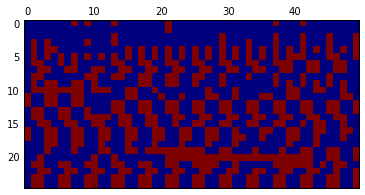

In [25]:
rows = 25
columns = 50
MyGrid=CAGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
MyGrid.FinishUpdate()
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(MyGrid['State'])

In [26]:
AnimationFrames = 200  #total number of frames in animation.
DelayBetweenFrames = 33 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 6.6 seconds long.


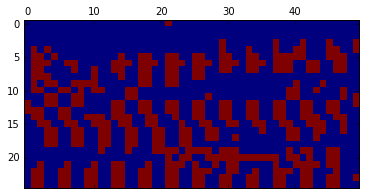

In [27]:
af(1)
MyFigure

In [28]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<video width="432.0" height="288.0" controls autoplay loop>
  <source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAAy8G1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTQ4IHIyNzIxIDcyZDUzYWIgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE2IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABkoZYiE
ADf//vbw/gU2O5jQlxHN6J0zH78VuLo0N73OAAADAAA33OZE/sqTBubAAALo8nwnJv2YCjBQgJ/s
VYMJsaz6HNU0d1NxVwnZ8cbVybfn8j7TINK1l8bOMaeggNnBLavS8walAkn8RzIUHvmJz5EhlmTK
eBonmE2cXUsy7oKK0a5hlhkrcLm6xsQp/+I6QYKwVMOEgJb3r9qofxHgjTTUMCyV8Xl1vlFGXC3k
NrUjcqCTZn2SD9UYlA/LX/xLCsO7m9l6u1+zwahPy8lZB+3cKQCuTeAArQg0atk20LZ1hMLhEZSD
QYkYBo2ssu+l28jrHYKXKDfdTpD7td6010nxSj813EKiZNRBLXKaFzl45BZP9J04iMNoCW7unM0k
bS01GdS7lmfhDxK97wJt7SLG97y1AP/GmLMyjMtjhmmT95F/1YaHSYpZP8JxtGi81K55qXCyEB62
4FBFfPJ5nrzoxA3KtNd9ljV+OeBZX2MFwA7gpajGHxJOGPObKW+KL8PrCmuudOkVLa3UW5DtebP5
89dv9eaVgZ/ErPR9Tz/v23QSfKWYVohHcH2Rt8h5HqBrvStQgQ4glj3/m2/an+a8Qwphmcdeb7Pn
3/Il9NOL0E80lUFYgK7OorOnJlfw7T+4+hyR6BryCTNwPSVCGFKEt8TD0oFf+y56OpjcMKyjT3iu
YQXijv8GXPueVoQjF2MLhvQchGy3YQeJ6NrQ/JwmgW81n2FfsPcy4wiPfD50wmPlcQSxMghENGyH
i2Fb4iHXU28BrvOjeBMnvsCCV2aTVMt2S+DIep9TxMQzr/L7gmSQDJH0eDSSAxdaYu02M9gkDjrj
SL5P6PrzLsR3yWMWeVs1uUl+mfq3s4oWCuuyWdxJ0hLI5KO2sJJgp1Y5QMQxaAQKZyAIUQAyXysZ
OcZse6NTeDwhoWi1GVib0epRCf6Ep9hPJiP6Bzse+7gAARIcdvtQzf6fburCBv/85jGcY5t1a2by
6NxAjn1NEsWzVuoznInPgf2YNudw/zmEaOIH/UfseeRIh4xZULZlOdcW9AhSqJ+Gt23/15Hs6oRu
pN4FNRojDolWAu+F/QC7cU4DR+JDgBB+Zd/zofGJfASbGl6nhmN0NZpsSV9bntyVTcz06qT+NHo4
W2N/s0AgXSiQe5putGnCpUbt2TqWQ5PZ5pbtstrdSy0Ji9qKFxwG8eEMEFtMsb5bsSsUl/AtYDZm
Ndf5io5YTL2xZg8bfoWUiD5ZQlUJoVe8ypAb3uBtEqnImakCI2fSaGlhugbneutzzhtidwxUZUcM
fvqI/ZjOunIbLVw2BfcEA0aAZ4O/ilPc8bcXetixp55srZKRpECyOpcR15bXyLPBwBeT8aueHZsN
YvhQE2L1PHiAYtZdun8A5A/Ixq2T6eEXjg6Vm4irm0LazNuZFBDdNbuvWd9ajcuvlF8YXlyCKoOl
XWowRNvLdOKnpX4ti5RJxDZFUUar5wETw8LFqqAF3kQAdJpk54yFV0xXmQM7FxxZdkmfoDlxBv4s
I/+ds6Nh1boCJsAdlseG4dk+9/6p71n6hx/eKKvu1TESMC001y8fuDVid3MjMiSLWdDdsfB+lQTi
yG//7S78K0txignbhm+O9u+zlj0owZQLLxhAVOgAHZgk1uhjKOHM1Ya4dplgRbXhtIc1LfVJwlq7
/njGzAoBmsD1ezGC70deuE2XCTXXqMxRIyw1avf/6z68F1o0RGhx/Rq//8KZHhjVGMFOKbcYmxv3
LmJT9NJP8TtxHL6CmJ/9XVuKB3fdHraGI/hap28Q9IiozDkuCN4aWirQvlg93nucZ59qQYXCWjON
eFWexYgZZz2u4yvjXB7TMbLkCbrcsel0HEXYOS4PtkTKG5haB/NZoIwtOESOYVKw/eagwNW/jbGT
n8VsvYa5RkebFL8t8WhCKikXnN/z6Viv6xMhyyF/rMi9Zsi457Avpy5EZPxBzPFDqt9RVkdsBhzE
UsBH5Lz1knmK5HMMkIpJW6f3qXLiARmx0e/nuSb7VVCVlcX8xOHGDYHqCZZA0VJnWrpc2C++O4na
y3/s1BxVXZsSCiIxc7YWEK5ysGHZvhj50JCYIFX+E6P9wTQ4sS0fWKFOs2iy6cdwsSXBy2B05Rh0
ze+pTuMZJX90sYNQ6cOVim6JxTkBIFHI2e139br4lMjNPA9Mkw0lD2Xx2NBHtO9bDvukdWDZpaZo
LzauJNRsElIhPKh+h9sBH5G7/07nEt/mv/4sJotknfqaCtP2ZsLRkBScJYqMa8lrM1UTqZf/AfRk
6FiBb7fd3lg1S9DCnqejZZjv2Z77pfrJo8RQduL4VQ8yUVCCio9Ul4ObLvqgpEpfozz1VMnEvJVY
aYa9AkEwhqFZlZnAwWpgjcs7aUH6auEv8sJlx21ere4p7HxvJBdKl7A2BNGOPyld5nOI0OCCD8uQ
G77ljg8EAAZUVKcqxpK4GDDpBUf3PcDkHPdYOUgE7ly7+qRb/X4gEJj2zr1D8JP7U59NxomixryQ
n+kN378Zkzki7JAyauLmWLqGY0bn3jJ7N6ZYT2F0hAK0K/WwGB6pnGu3lw2nKRdQIxVTccZZ96u5
OpUZzML1am+UQlMwABB0QFfxNKQ37w9JSOS4oepmiMOp3Po4gji4ajr8hHKI897y5E3LeQOpgmXf
PiDJyv91Sh1QqpObWRYpT6bSfRcUIT6zulBvqkDv+HJOJY4KcNdZPsCLUPNtkinJJgQ1V7Es3a+S
UE7OQZXwb6KmecogMyNsl0hFOueGY9KVRSQg31L+vQM/wXpLrrZ0VFBcK5HXrMN0d7GosAOHLJ2t
1YNvgPoE+7KovfyJWNtsCZed/e8ms6qqep0a

<h2>Glider Example</h2>
<h3>Small Grid Example</h3>
<p>A good test for the game of life simulation is if a <a href = http://web.stanford.edu/~cdebs/GameOfLife/ >glider</a> will act correctly. 

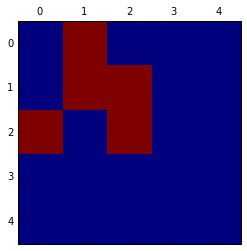

In [47]:
rows = 5
columns = 5
MyGrid=CAGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
numpy.copyto(MyGrid['State'],numpy.zeros((rows,columns),dtype=numpy.dtype(bool)))
MyGrid['State'][0][1] = True
MyGrid['State'][1][1] = True
MyGrid['State'][1][2] = True
MyGrid['State'][2][0] = True
MyGrid['State'][2][2] = True

MyGrid.FinishUpdate()
MyAxes.matshow(MyGrid['State'])
MyFigure

In [24]:
AnimationFrames = 20  #total number of frames in animation.
DelayBetweenFrames = 1000 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 20.0 seconds long.


In [30]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

RuntimeError: No MovieWriters available!

<h3>Large Grid Example</h3>
<h4>Up and to the right</h4>

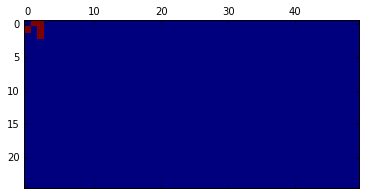

In [26]:
rows = 25
columns = 50
MyGrid=CAGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
numpy.copyto(MyGrid['State'],numpy.zeros((rows,columns),dtype=numpy.dtype(bool)))
MyGrid['State'][0][1] = True
MyGrid['State'][1][1] = True
MyGrid['State'][1][2] = True
MyGrid['State'][2][0] = True
MyGrid['State'][2][2] = True

MyGrid.FinishUpdate()
MyAxes.matshow(MyGrid['State'])
MyFigure

In [27]:
AnimationFrames = 250  #total number of frames in animation.
DelayBetweenFrames = 20 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 5.0 seconds long.


In [28]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h4>Down and to the left</h4>

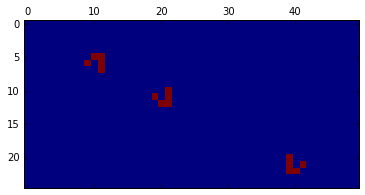

In [29]:
rows = 25
columns = 50
MyGrid=CAGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
numpy.copyto(MyGrid['State'],numpy.zeros((rows,columns),dtype=numpy.dtype(bool)))
MyGrid['State'][5][10] = True
MyGrid['State'][6][10] = True
MyGrid['State'][6][11] = True
MyGrid['State'][7][9]  = True
MyGrid['State'][7][11] = True

MyGrid['State'][12][20] = True
MyGrid['State'][11][20] = True
MyGrid['State'][11][21] = True
MyGrid['State'][10][19] = True
MyGrid['State'][10][21] = True

MyGrid['State'][22][40] = True
MyGrid['State'][21][40] = True
MyGrid['State'][21][39] = True
MyGrid['State'][20][41] = True
MyGrid['State'][20][39] = True


MyGrid.FinishUpdate()
MyAxes.matshow(MyGrid['Value'])
MyFigure

In [30]:
AnimationFrames = 100  #total number of frames in animation.
DelayBetweenFrames = 100 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 10.0 seconds long.


In [31]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

In [32]:
MyAnimation.save('ThreeGliders.mp4')

<h2>Full Game of Life Simulations</h2>
<h3>Simulation 01</h3>

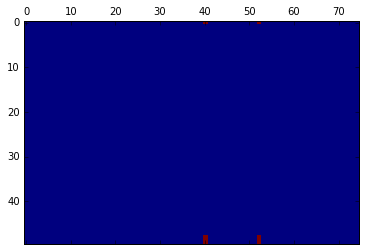

In [33]:
rows = 50
columns = 75
MyGrid=CAGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
MyGrid.FinishUpdate()
MyAxes.matshow(MyGrid['Value'])
MyFigure

In [34]:
AnimationFrames = 1000  #total number of frames in animation.
DelayBetweenFrames = 33 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 33.0 seconds long.


In [35]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h3>Simulation 02</h3>

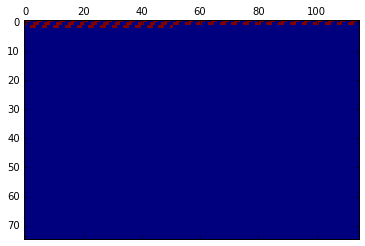

In [36]:
rows = 75
columns = 115
MyGrid=CAGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
MyGrid.SetValue()
MyGrid.SetBoundary()
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(MyGrid['State'])

In [37]:
AnimationFrames = 600  #total number of frames in animation.
DelayBetweenFrames = 33 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 19.8 seconds long.


In [38]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation